In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
conn = psycopg2.connect("dbname=fleebmarket user=fleebmarket host=localhost")


In [2]:
cur = conn.cursor()


In [3]:
cur.execute("SELECT count(*) as c, author, is_duplicate from search_app_redditadvert where ad_type in ('Selling', 'Sold', 'Buying', 'Purchased') group by author, is_duplicate;")
data = cur.fetchall()

In [4]:
cur.execute("SELECT author, is_duplicate, created_utc, ad_type from search_app_redditadvert where ad_type in ('Selling', 'Sold', 'Buying', 'Purchased') ;")
data = cur.fetchall()
len(data)

49164

In [5]:
df = pd.DataFrame(data, columns=["author", "is_duplicate", "created_utc", "ad_type"])
df["created_utc"] = pd.to_datetime(df["created_utc"], utc=True)
df["date"] = df["created_utc"].apply(lambda d: d.date())
df = df[df["date"] > np.datetime64('2021-05-01')]
df

,author,is_duplicate,created_utc,ad_type,date
0,n00basaur,True,2021-05-16 21:22:38+00:00,Selling,2021-05-16
1,cookoojeffy,True,2021-08-25 21:42:34+00:00,Selling,2021-08-25
2,dxevin12,True,2021-06-21 21:48:35+00:00,Selling,2021-06-21
3,RyuDragoon,False,2021-12-12 15:33:36+00:00,Selling,2021-12-12
4,digitalxrt,True,2021-11-14 18:27:53+00:00,Selling,2021-11-14
...,...,...,...,...,...
49159,michaelengel,True,2022-01-20 03:10:58+00:00,Selling,2022-01-20
49160,michaelengel,True,2022-01-11 18:27:06+00:00,Selling,2022-01-11
49161,michaelengel,True,2022-01-07 03:03:45+00:00,Selling,2022-01-07
49162,michaelengel,True,2022-01-02 06:06:57+00:00,Selling,2022-01-02


In [6]:
set(df["ad_type"])

{'Buying', 'Purchased', 'Selling', 'Sold'}

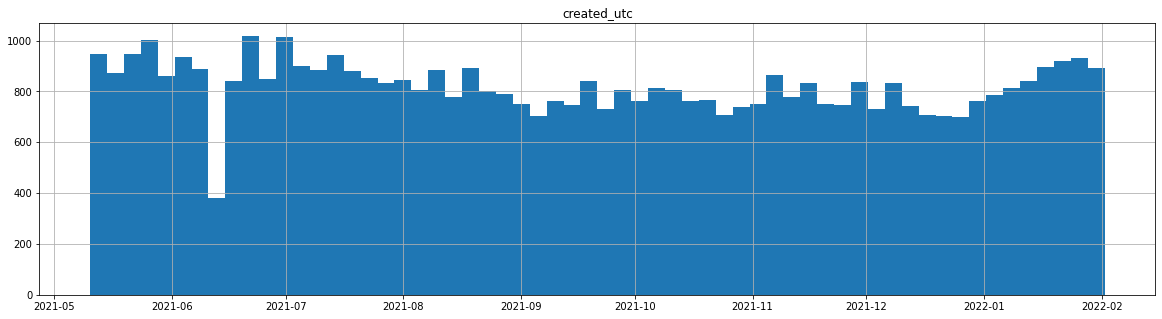

In [7]:
ax = df.hist(column="created_utc", bins=60, figsize=(20, 5))

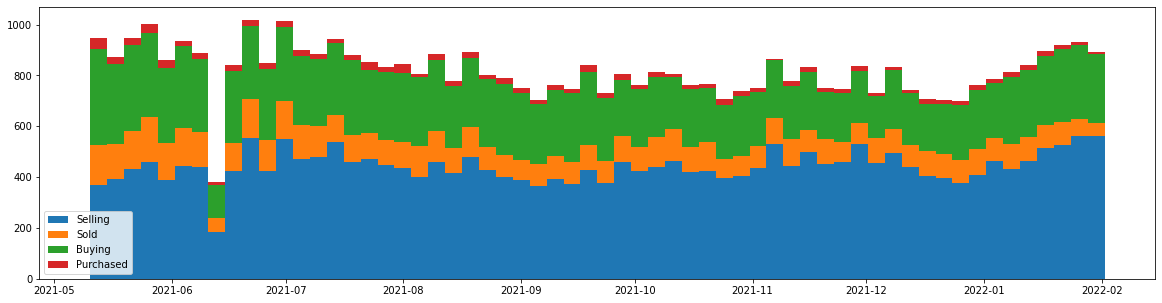

In [23]:
fig, ax = plt.subplots(figsize=(20,5))
ad_types = [ "Selling", "Sold", "Buying", "Purchased"]
ax.hist(
    [
        df[df["ad_type"] == ad_type]['created_utc']
        for ad_type in ad_types
    ],
    bins=60,
    stacked=True,
    label=ad_types
)
plt.legend()
plt.savefig("histogram_by_type.png", pad_inches=0, bbox_inches='tight')

In [9]:
df.groupby('ad_type').count()

,author,is_duplicate,created_utc,date
ad_type,,,,
Buying,15157,15157,15157,15157
Purchased,1189,1189,1189,1189
Selling,26549,26549,26549,26549
Sold,6268,6268,6268,6268


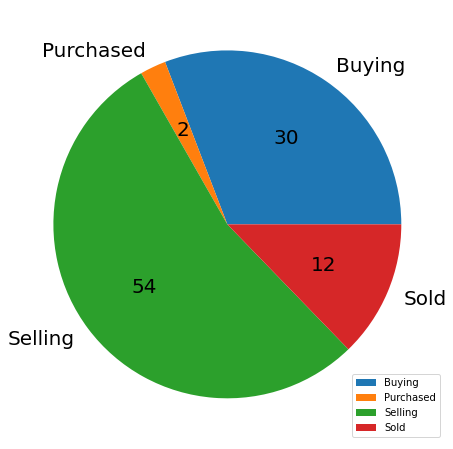

In [31]:
df.groupby('ad_type').count().plot.pie(y="author", autopct="%d", figsize=(8,  8), fontsize=20, ylabel='')
plt.savefig("pie_type.png", pad_inches=0, bbox_inches='tight')

In [11]:
df_selling = df[df['ad_type'] == "Selling"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


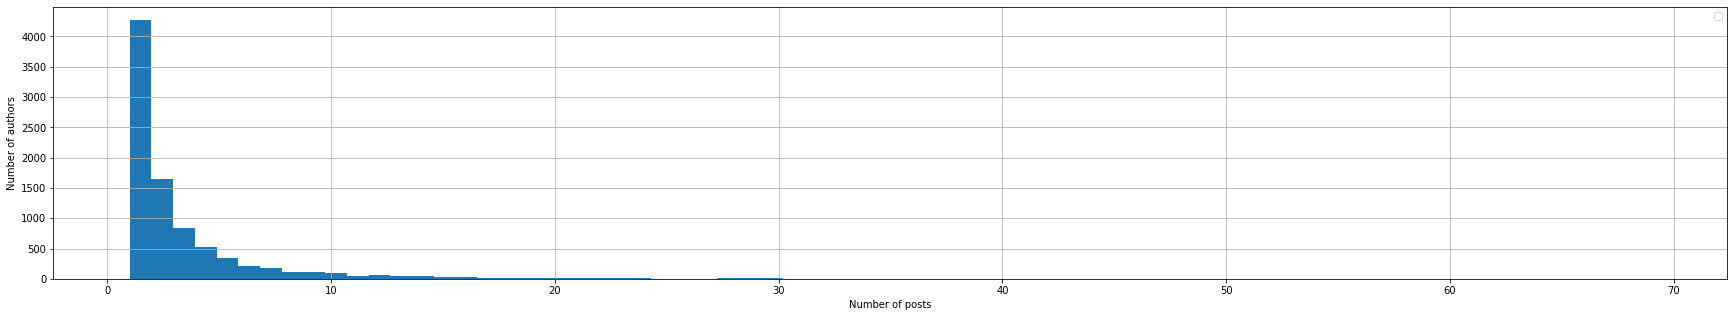

In [32]:
bins = [1,2,3,5,10,20,30,50,100]
ax = df_selling.groupby('author').size().hist(bins=70, figsize=(30,5), legend=True)
ax.set_xlabel("Number of posts")
ax.set_ylabel("Number of authors")
plt.savefig("Number of adverts by author.png", pad_inches=0, bbox_inches='tight')

In [13]:
from collections import defaultdict
hist_data_raw = defaultdict(lambda: 0)
for value in df_selling.groupby('author').size():
    hist_data_raw[value] += 1
hist_data_raw

defaultdict(<function __main__.<lambda>()>,
            {3: 841,
             9: 112,
             17: 20,
             2: 1648,
             6: 218,
             1: 4272,
             4: 519,
             11: 53,
             5: 344,
             8: 109,
             16: 28,
             7: 178,
             14: 38,
             10: 90,
             30: 7,
             12: 58,
             26: 3,
             34: 3,
             40: 3,
             29: 6,
             38: 4,
             19: 12,
             18: 16,
             23: 11,
             36: 2,
             22: 10,
             28: 5,
             13: 42,
             20: 9,
             24: 6,
             42: 1,
             15: 30,
             69: 1,
             21: 9,
             53: 1,
             25: 4,
             27: 3,
             54: 2,
             46: 1,
             66: 1,
             31: 3,
             48: 1,
             32: 2,
             37: 2,
             44: 1,
             63: 1,
             

In [14]:
hist_data = {}
for key, value in hist_data_raw.items():
    hist_data[key] = value * key
hist_data

{3: 2523,
 9: 1008,
 17: 340,
 2: 3296,
 6: 1308,
 1: 4272,
 4: 2076,
 11: 583,
 5: 1720,
 8: 872,
 16: 448,
 7: 1246,
 14: 532,
 10: 900,
 30: 210,
 12: 696,
 26: 78,
 34: 102,
 40: 120,
 29: 174,
 38: 152,
 19: 228,
 18: 288,
 23: 253,
 36: 72,
 22: 220,
 28: 140,
 13: 546,
 20: 180,
 24: 144,
 42: 42,
 15: 450,
 69: 69,
 21: 189,
 53: 53,
 25: 100,
 27: 81,
 54: 108,
 46: 46,
 66: 66,
 31: 93,
 48: 48,
 32: 64,
 37: 74,
 44: 44,
 63: 63,
 39: 39,
 60: 60,
 49: 98,
 35: 35}

Text(0, 0.5, 'Cummulative number of posts')

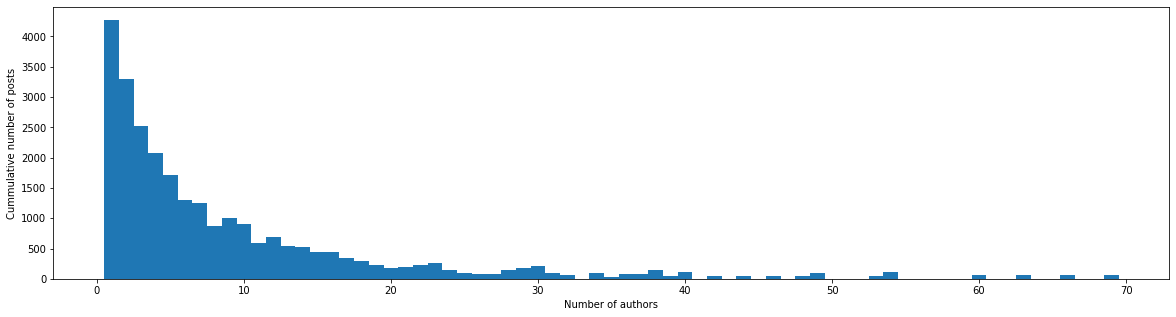

In [15]:
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(x=list(hist_data.keys()), height=list(hist_data.values()), width=1)
ax.set_xlabel("Number of authors")
ax.set_ylabel("Cummulative number of posts")

In [16]:
def is_last_post(row):
    author = row['author']
    df_author = df[df['author'] == author]
    return all((row['created_utc'] >= created) for created in df_author['created_utc'])
df_selling['is_last_post'] = df_selling.apply(is_last_post, axis="columns")
df_selling

/tmp/ipykernel_11036/1466094488.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selling['is_last_post'] = df_selling.apply(is_last_post, axis="columns")


,author,is_duplicate,created_utc,ad_type,date,is_last_post
0,n00basaur,True,2021-05-16 21:22:38+00:00,Selling,2021-05-16,False
1,cookoojeffy,True,2021-08-25 21:42:34+00:00,Selling,2021-08-25,False
2,dxevin12,True,2021-06-21 21:48:35+00:00,Selling,2021-06-21,False
3,RyuDragoon,False,2021-12-12 15:33:36+00:00,Selling,2021-12-12,False
4,digitalxrt,True,2021-11-14 18:27:53+00:00,Selling,2021-11-14,False
...,...,...,...,...,...,...
49159,michaelengel,True,2022-01-20 03:10:58+00:00,Selling,2022-01-20,False
49160,michaelengel,True,2022-01-11 18:27:06+00:00,Selling,2022-01-11,False
49161,michaelengel,True,2022-01-07 03:03:45+00:00,Selling,2022-01-07,False
49162,michaelengel,True,2022-01-02 06:06:57+00:00,Selling,2022-01-02,False


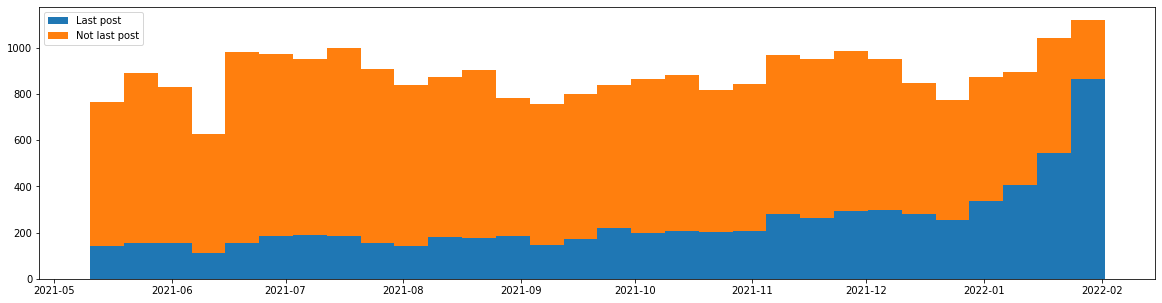

In [33]:
fig, ax = plt.subplots(figsize=(20,5))
ax.hist(
    [
        df_selling[df_selling["is_last_post"] == val]['created_utc']
        for val in [True, False]
    ],
    bins=30,
    stacked=True,
    label=["Last post", "Not last post"]
)
plt.legend()
plt.savefig("last post.png", pad_inches=0, bbox_inches='tight')

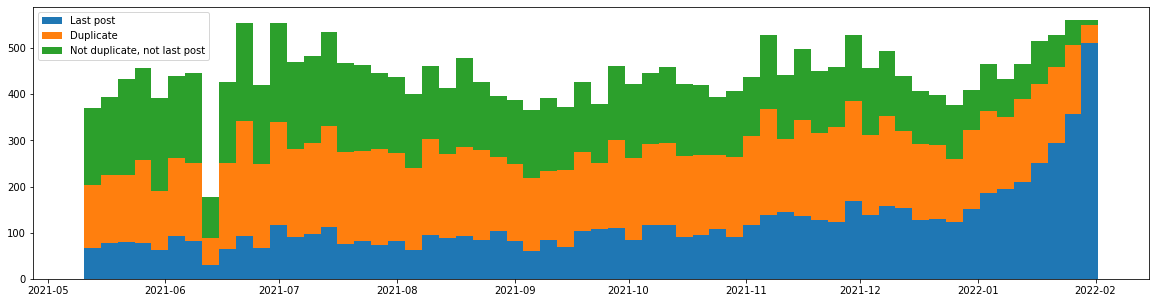

In [34]:
fig, ax = plt.subplots(figsize=(20,5))
ax.hist(
    [
        df_selling[(df_selling["is_last_post"] == val1) & (df_selling["is_duplicate"] == val2)]['created_utc']
        for val1, val2 in ((True, False),(False, True),(False, False))
    ],
    bins=60,
    stacked=True,
    label=["Last post", "Duplicate", "Not duplicate, not last post"] 
)
plt.legend()
plt.savefig("duplicates.png", pad_inches=0, bbox_inches='tight')

In [ ]:
df_selling[df_selling['is_duplicate'] & df_selling['is_last_post']]

,author,is_duplicate,created_utc,ad_type,date,is_last_post


In [ ]:
df_selling.groupby(['is_duplicate', 'is_last_post'], as_index=False).count()

,is_duplicate,is_last_post,author,created_utc,ad_type,date
0,False,False,8785,8785,8785,8785
1,False,True,7303,7303,7303,7303
2,True,False,10461,10461,10461,10461
